In [2]:
import zipfile
import os
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv('survey.csv', skiprows=4)  # World Bank CSVs usually have 4 rows of metadata

df.head()

,2014-08-27 11:29:46,31,Male,United Kingdom,NA,NA.1,Yes,Yes.1,Often,26-100,...,Somewhat difficult,Yes.4,Yes.5,Some of them,No.5,Maybe,Maybe.1,No.6,Yes.6,NA.2
0,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
1,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
2,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
3,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
4,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   20140827_112931  1258 non-null   object
 1   37               1258 non-null   int64 
 2   Female           1258 non-null   object
 3   United_States    1258 non-null   object
 4   IL               743 non-null    object
 5   NA               1241 non-null   object
 6   No               1258 non-null   object
 7   Yes              1258 non-null   object
 8   Often            994 non-null    object
 9   625              1258 non-null   object
 10  No1              1258 non-null   object
 11  Yes1             1258 non-null   object
 12  Yes2             1258 non-null   object
 13  Not_sure         1258 non-null   object
 14  No2              1258 non-null   object
 15  Yes3             1258 non-null   object
 16  Yes4             1258 non-null   object
 17  Somewhat_easy    1258 non-null   

In [9]:
df.tail()


,20140827_112931,37,Female,United_States,IL,NA,No,Yes,Often,625,...,Somewhat_easy,No3,No4,Some_of_them,Yes5,No5,Maybe,Yes6,No6,NA1
1253,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1254,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1255,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1256,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1257,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [11]:
df.shape

(1258, 27)

In [12]:
df.isnull().count()

20140827_112931    1258
37                 1258
Female             1258
United_States      1258
IL                 1258
NA                 1258
No                 1258
Yes                1258
Often              1258
625                1258
No1                1258
Yes1               1258
Yes2               1258
Not_sure           1258
No2                1258
Yes3               1258
Yes4               1258
Somewhat_easy      1258
No3                1258
No4                1258
Some_of_them       1258
Yes5               1258
No5                1258
Maybe              1258
Yes6               1258
No6                1258
NA1                1258
dtype: int64

In [13]:
df.columns.tolist()


['20140827_112931',
 '37',
 'Female',
 'United_States',
 'IL',
 'NA',
 'No',
 'Yes',
 'Often',
 '625',
 'No1',
 'Yes1',
 'Yes2',
 'Not_sure',
 'No2',
 'Yes3',
 'Yes4',
 'Somewhat_easy',
 'No3',
 'No4',
 'Some_of_them',
 'Yes5',
 'No5',
 'Maybe',
 'Yes6',
 'No6',
 'NA1']

In [14]:
# Display first 5 rows with transposed columns to inspect their meaning
df.head(5).T


,0,1,2,3,4
20140827_112931,2014-08-27 11:29:37,2014-08-27 11:29:44,2014-08-27 11:29:46,2014-08-27 11:30:22,2014-08-27 11:31:22
37,44,32,31,31,33
Female,M,Male,Male,Male,Male
United_States,United States,Canada,United Kingdom,United States,United States
IL,IN,NaN,NaN,TX,TN
NA,NaN,NaN,NaN,NaN,NaN
No,No,No,Yes,No,Yes
Yes,No,No,Yes,No,No
Often,Rarely,Rarely,Often,Never,Sometimes
625,More than 1000,6-25,26-100,100-500,6-25


In [15]:
df = df.rename(columns={
    'Female': 'Gender',
    'United_States': 'Country',
    'Yes1': 'Diagnosed_MH',
    'Yes2': 'Discussed_MH_At_Work',
    'Yes4': 'Would_Seek_Help',
    'Not_sure': 'Unsure_MH',
    'No1': 'No_Org_Support'
})

In [16]:
# Step 1: Gender Cleaning
df['Gender'] = df['Gender'].str.lower().map({
    'male': 'Male', 'm': 'Male',
    'female': 'Female', 'f': 'Female'
})


In [17]:
df = df[df['Gender'].isin(['Male', 'Female'])]

In [18]:
# Step 2: Gender-based MH Diagnosis
diagnosed_counts = df[df['Diagnosed_MH'] == 'Yes'].groupby('Gender').size()
gender_counts = df.groupby('Gender').size()
mh_diag_percent = (diagnosed_counts / gender_counts * 100).fillna(0)

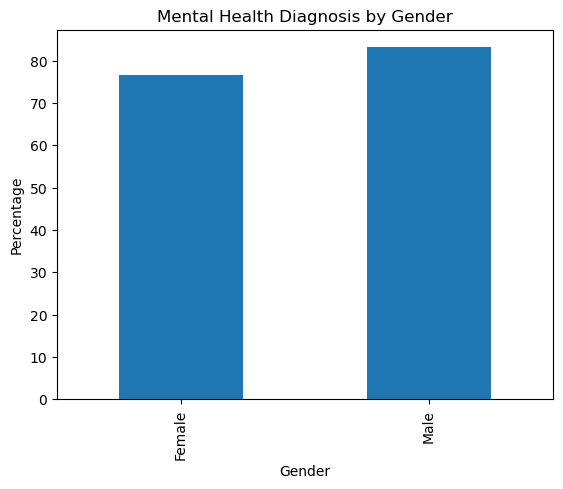

In [19]:
mh_diag_percent.plot(kind='bar', title='Mental Health Diagnosis by Gender', ylabel='Percentage')
plt.show()

In [20]:
support = df[df['Discussed_MH_At_Work'] == 'Yes'].groupby('Gender').size()
support_percent = (support / gender_counts * 100).fillna(0)

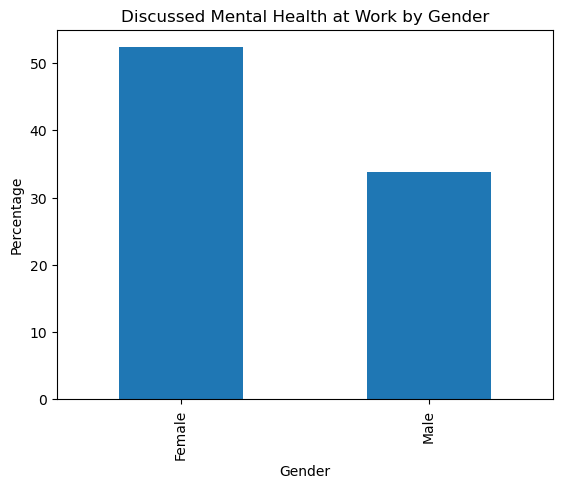

In [21]:
support_percent.plot(kind='bar', title='Discussed Mental Health at Work by Gender', ylabel='Percentage')
plt.show()

In [22]:
stress_related_cols = ['Diagnosed_MH', 'Discussed_MH_At_Work', 'Would_Seek_Help', 'Unsure_MH']
stress_counts = df[stress_related_cols].apply(lambda x: x.value_counts()).fillna(0)


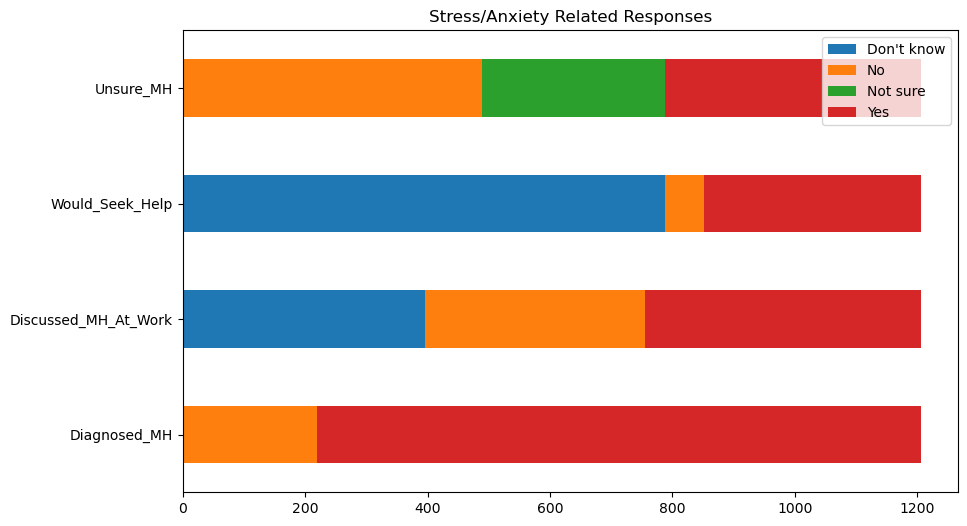

In [23]:
stress_counts.T.plot(kind='barh', stacked=True, figsize=(10,6), title='Stress/Anxiety Related Responses')
plt.show()